# Data Sources

## 1. Country dataset with regional codes

In [1]:
!wget https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv -O data/countries.csv

--2020-05-22 15:31:19--  https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.64.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20759 (20K) [text/plain]
Saving to: ‘data/countries.csv’

data/countries.csv  100%[===================>]  20.27K  --.-KB/s    in 0.03s   

2020-05-22 15:31:20 (689 KB/s) - ‘data/countries.csv’ saved [20759/20759]



In [11]:
import pandas as pd

countries_df = pd.read_csv('data/countries.csv')

countries_df.rename(columns={'alpha-3':'iso3','alpha-2':'iso2'}, inplace=True)
countries_df.drop(columns=['iso_3166-2','country-code','region-code','sub-region-code',\
                           'intermediate-region-code'], inplace=True)
countries_df

,name,iso2,iso3,region,sub-region,intermediate-region
0,Afghanistan,AF,AFG,Asia,Southern Asia,NaN
1,Åland Islands,AX,ALA,Europe,Northern Europe,NaN
2,Albania,AL,ALB,Europe,Southern Europe,NaN
3,Algeria,DZ,DZA,Africa,Northern Africa,NaN
4,American Samoa,AS,ASM,Oceania,Polynesia,NaN
...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia,NaN
245,Western Sahara,EH,ESH,Africa,Northern Africa,NaN
246,Yemen,YE,YEM,Asia,Western Asia,NaN
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa,Eastern Africa


## 2. GADM whole world shapefile data

https://biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip

In [12]:
%%bash
mkdir -p data/gadm36
wget https://biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip -O data/gadm36/gadm36_levels_shp.zip
unzip data/gadm36/gadm36_levels_shp.zip -d data/gadm36
ls -la data/gadm36

Archive:  data/gadm36/gadm36_levels_shp.zip
 extracting: data/gadm36/gadm36_0.cpg  
  inflating: data/gadm36/gadm36_0.dbf  
  inflating: data/gadm36/gadm36_0.prj  
  inflating: data/gadm36/gadm36_0.shp  
  inflating: data/gadm36/gadm36_0.shx  
 extracting: data/gadm36/gadm36_1.cpg  
  inflating: data/gadm36/gadm36_1.dbf  
  inflating: data/gadm36/gadm36_1.prj  
  inflating: data/gadm36/gadm36_1.shp  
  inflating: data/gadm36/gadm36_1.shx  
 extracting: data/gadm36/gadm36_2.cpg  
  inflating: data/gadm36/gadm36_2.dbf  
  inflating: data/gadm36/gadm36_2.prj  
  inflating: data/gadm36/gadm36_2.shp  
  inflating: data/gadm36/gadm36_2.shx  
 extracting: data/gadm36/gadm36_3.cpg  
  inflating: data/gadm36/gadm36_3.dbf  
  inflating: data/gadm36/gadm36_3.prj  
  inflating: data/gadm36/gadm36_3.shp  
  inflating: data/gadm36/gadm36_3.shx  
 extracting: data/gadm36/gadm36_4.cpg  
  inflating: data/gadm36/gadm36_4.dbf  
  inflating: data/gadm36/gadm36_4.prj  
  inflating: data/gadm36/gadm36_4.sh

--2020-05-22 15:38:13--  https://biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip [following]
--2020-05-22 15:38:14--  https://data.biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1262756764 (1.2G) [application/zip]
Saving to: ‘data/gadm36/gadm36_levels_shp.zip’

     0K .......... .......... .......... .......... ..........  0%  350K 58m44s
    50K .......... .......... .......... .......... ..........  0%  679K 44m30s
   100K .......... .......... .......... ......

In [14]:
!rm data/gadm36/gadm36_levels_shp.zip

rm: cannot remove 'data/gadm36/gadm36_levels_shp.zip': No such file or directory


### Pick Levels 0 and 1 shape files

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

gadm1_gdf = gpd.read_file('data/gadm36/gadm36_1.shp')

In [16]:
gadm0_gdf = gpd.read_file('data/gadm36/gadm36_0.shp')

### Merge Levels 0 and 1 with country regional code data set

In [17]:
gadm1a_gdf = gadm1_gdf.merge(countries_df, left_on='GID_0', right_on='iso3', how='inner')

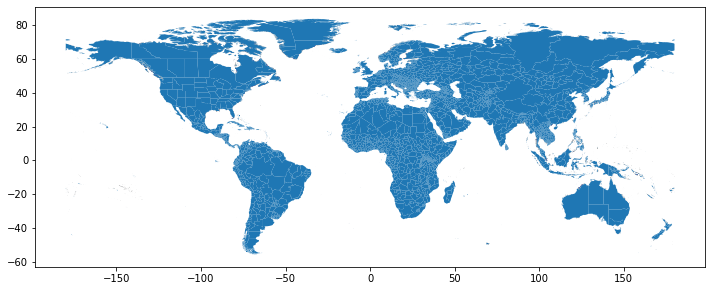

In [18]:
gadm1a_gdf.plot(figsize=(12,7))

In [19]:
gadm0a_gdf = gadm0_gdf.merge(countries_df, left_on='GID_0', right_on='iso3', how='inner')

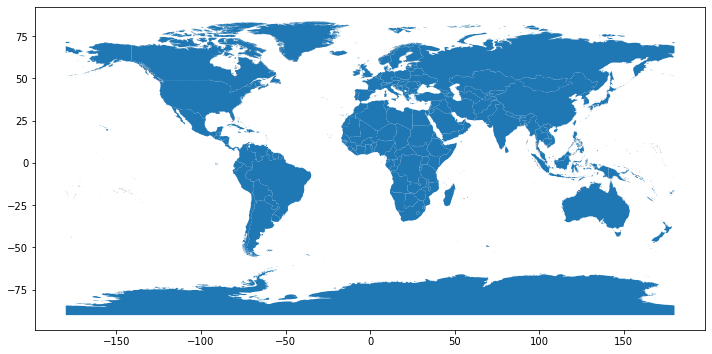

In [20]:
gadm0a_gdf.plot(figsize=(12,7))

### African Continent - GADM Level 1 (with provinces)

In [21]:
africa1_gdf = gadm1a_gdf[gadm1a_gdf['region']=='Africa']

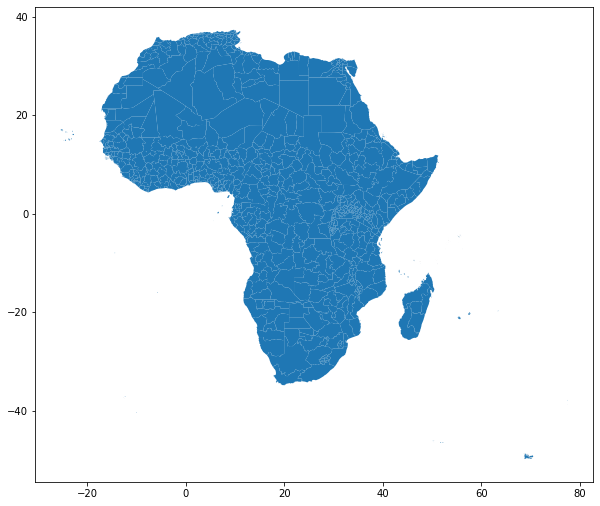

In [22]:
africa1_gdf.plot(figsize=(10,10))

In [23]:
africa1_gdf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,name,iso2,iso3,region,sub-region,intermediate-region
34,AGO,Angola,AGO.1_1,Bengo,None,None,Província,Province,1,AO.BO,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",Angola,AO,AGO,Africa,Sub-Saharan Africa,Middle Africa
35,AGO,Angola,AGO.2_1,Benguela,Benguella,None,Província,Province,2,AO.BG,"MULTIPOLYGON (((12.52236 -13.45208, 12.52236 -...",Angola,AO,AGO,Africa,Sub-Saharan Africa,Middle Africa
36,AGO,Angola,AGO.3_1,Bié,None,None,Província,Province,3,AO.BI,"POLYGON ((17.80354 -13.74234, 17.81293 -13.761...",Angola,AO,AGO,Africa,Sub-Saharan Africa,Middle Africa
37,AGO,Angola,AGO.4_1,Cabinda,None,None,Província,Province,4,AO.CB,"POLYGON ((12.21127 -5.78652, 12.21125 -5.78647...",Angola,AO,AGO,Africa,Sub-Saharan Africa,Middle Africa
38,AGO,Angola,AGO.5_1,Cuando Cubango,None,None,Província,Province,5,AO.CC,"POLYGON ((19.89892 -17.87674, 19.89082 -17.882...",Angola,AO,AGO,Africa,Sub-Saharan Africa,Middle Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,ZWE,Zimbabwe,ZWE.6_1,Mashonaland West,None,None,Province,Province,None,ZW.MW,"POLYGON ((30.37916 -18.83976, 30.36814 -18.836...",Zimbabwe,ZW,ZWE,Africa,Sub-Saharan Africa,Eastern Africa
3592,ZWE,Zimbabwe,ZWE.7_1,Masvingo,None,None,Province,Province,None,ZW.MV,"POLYGON ((31.06733 -22.34189, 31.07606 -22.343...",Zimbabwe,ZW,ZWE,Africa,Sub-Saharan Africa,Eastern Africa
3593,ZWE,Zimbabwe,ZWE.8_1,Matabeleland North,None,None,Province,Province,None,ZW.MN,"POLYGON ((28.66857 -20.30021, 28.65701 -20.284...",Zimbabwe,ZW,ZWE,Africa,Sub-Saharan Africa,Eastern Africa
3594,ZWE,Zimbabwe,ZWE.9_1,Matabeleland South,None,None,Province,Province,None,ZW.MS,"POLYGON ((31.05947 -22.33982, 31.05900 -22.339...",Zimbabwe,ZW,ZWE,Africa,Sub-Saharan Africa,Eastern Africa


### African Continent - GADM Level 1 (country boundaries)

In [24]:
africa0_gdf = gadm0a_gdf[gadm0a_gdf['region']=='Africa']

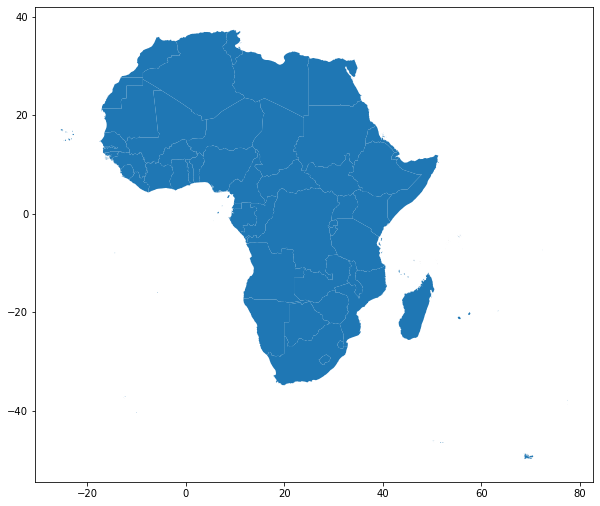

In [25]:
africa0_gdf.plot(figsize=(10,10))

## Create filter simple polygons and GeoDataFrame with unary union

We will create Shapely polygons from the `unary union` geometry. This `unary_union` operation takes approximate 5-10 minutes.

In [ ]:
%%time
africa_polygons = africa0_gdf['geometry'].unary_union

africa_polygons

In [ ]:
africa_polygons_gdf = gpd.GeoDataFrame(gpd.GeoSeries(africa_polygons), crs=africa0_gdf.crs)
africa_polygons_gdf = africa_polygons_gdf.rename(columns={0:'geometry'}).set_geometry('geometry')

africa_polygons_gdf.plot()

In [ ]:
africa_polygons_gdf

In [ ]:
%%time
africa_simple_gdf = africa_polygons_gdf.simplify(tolerance=0.2, preserve_topology=False)

africa_simple_gdf.plot()

## Pickle GDFs

In [ ]:
africa1_gdf.to_pickle('data/africa1_gdf.pickle')
africa0_gdf.to_pickle('data/africa0_gdf.pickle')
africa_polygons_gdf.to_pickle('data/africa_polygons_gdf.pickle')
africa_simple_gdf.to_pickle('data/africa_simple_gdf.pickle')
